#Introduction

This notebook analyzes cleaned data in order to understand the relationship between temperature and kelp growth in the Salish Sea

## Import libraries

In [31]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Import Data

In [32]:
path = "https://raw.githubusercontent.com/sgolden3/Data-5100-Kelp/refs/heads/main/Data/cleaned_data/"

bed_vars = [
    'Aiston_Preserve','Biz_Point','Cherry_Point_Gulf_Rd','Clallam_Bay','Coffin_Rocks',
    'Ebeys_Landing','Freshwater_Bay_1','Freshwater_Bay_2','Hat_Island','Hoypus_Point',
    'Lowell','Lummi_SW','North_Beach_East','Polnell_Point','Possession_Point',
    'Shannon_Point_East','Shannon_Point_West'
]

# creates a csv for each bed as defined above
for var in bed_vars:
    globals()[var] = pd.read_csv(path + var + ".csv")

In [33]:
Ebeys_Landing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Bed Name             27 non-null     object 
 1   Site Code            27 non-null     object 
 2   Survey Date          27 non-null     object 
 3   Survey Day           27 non-null     float64
 4   NWSC Max Ext         27 non-null     float64
 5   Survey Month         27 non-null     float64
 6   Survey Year          27 non-null     float64
 7   Acres                27 non-null     float64
 8   Temp                 18 non-null     float64
 9   Temp1 Shore Edge     9 non-null      float64
 10  Temp1 Water Edge     11 non-null     float64
 11  Temp2 Shore Edge     3 non-null      float64
 12  Temp2 Water Edge     4 non-null      float64
 13  Ave Temp Shore Edge  9 non-null      float64
 14  Ave Temp Water Edge  9 non-null      float64
dtypes: float64(12), object(3)
memory usage: 3.

## Make one consolidated temperature column

The current temperature column has many nans, however there are other temperature related columns (such as Temp Shore Edge) that have infomation in the same row. We want fill one singular value for temperature, based on the information we have.

In [34]:
def fill_temperature(df):
    """
    Fills a new temperature column 'Temp_Final' using the following logic:

    1. If Temp exists → use Temp
    2. Else:
        a. If both Ave Temp Shore Edge and Ave Temp Water Edge exist:
              (Ave Temp Shore Edge + Ave Temp Water Edge) / 2
        b. Else:
              ((Temp1 Shore Edge + Temp2 Shore Edge)/2  +
               (Temp1 Water Edge + Temp2 Water Edge)/2) / 2
    """

    df["Temp_Final"] = np.where(
        ~df["Temp"].isna(),                      # Case 1: Temp exists
        df["Temp"],                              # → use Temp

        np.where(
            (~df["Ave Temp Shore Edge"].isna()) &
            (~df["Ave Temp Water Edge"].isna()), # Case 2a: both average temps exist
            (df["Ave Temp Shore Edge"] + df["Ave Temp Water Edge"]) / 2,

            # Case 2b: fallback using Temp1/Temp2 averages
            (
                ((df["Temp1 Shore Edge"] + df["Temp2 Shore Edge"]) / 2) +
                ((df["Temp1 Water Edge"] + df["Temp2 Water Edge"]) / 2)
            ) / 2
        )
    )

    return df

In [35]:
fill_temperature(Ebeys_Landing)

,Bed Name,Site Code,Survey Date,Survey Day,NWSC Max Ext,Survey Month,Survey Year,Acres,Temp,Temp1 Shore Edge,Temp1 Water Edge,Temp2 Shore Edge,Temp2 Water Edge,Ave Temp Shore Edge,Ave Temp Water Edge,Temp_Final
0,Ebey's Landing,EBL,2015-06-14,14.0,0.0,6.0,2015.0,9.490754,11.0,NaN,NaN,NaN,NaN,NaN,NaN,11.00
1,Ebey's Landing,EBL,2015-07-19,19.0,0.0,7.0,2015.0,14.626063,13.0,NaN,NaN,NaN,NaN,NaN,NaN,13.00
2,Ebey's Landing,EBL,2015-08-15,15.0,1.0,8.0,2015.0,18.354044,13.0,NaN,NaN,NaN,NaN,NaN,NaN,13.00
3,Ebey's Landing,EBL,2015-09-26,26.0,0.0,9.0,2015.0,17.885642,12.0,NaN,NaN,NaN,NaN,NaN,NaN,12.00
4,Ebey's Landing,EBL,2016-06-25,25.0,0.0,6.0,2016.0,18.282310,14.0,NaN,NaN,NaN,NaN,NaN,NaN,14.00
5,Ebey's Landing,EBL,2016-07-22,22.0,1.0,7.0,2016.0,20.396699,12.0,NaN,NaN,NaN,NaN,NaN,NaN,12.00
6,Ebey's Landing,EBL,2016-08-19,19.0,0.0,8.0,2016.0,18.985232,13.0,NaN,NaN,NaN,NaN,NaN,NaN,13.00
7,Ebey's Landing,EBL,2017-06-26,26.0,0.0,6.0,2017.0,14.044818,11.0,NaN,NaN,NaN,NaN,NaN,NaN,11.00
8,Ebey's Landing,EBL,2017-07-25,25.0,0.0,7.0,2017.0,20.161350,12.0,NaN,NaN,NaN,NaN,NaN,NaN,12.00
9,Ebey's Landing,EBL,2017-08-23,23.0,0.0,8.0,2017.0,20.945903,13.0,NaN,NaN,NaN,NaN,NaN,NaN,13.00


## Make correlation matrices for each bed

### Intermediate step inlucdes retrieving the temperature data from previous years

In [36]:
def max_corr(df):

    df["Survey Date"] = pd.to_datetime(df["Survey Date"])

    # 1. Select Max Extent only
    df_max = (
        df[df["NWSC Max Ext"] == 1]
        .sort_values(["Site Code", "Survey Year", "Acres"],
                     ascending=[True, True, False])
        .drop_duplicates(subset=["Site Code", "Survey Year"], keep="first")
        .copy()
    )

    df_max["PctAcreChange"] = (
        df_max.groupby("Site Code")["Acres"]
              .pct_change()
              * 100
    )

    # 2. Build lagged temp predictors (shift-based)
    df_max["Temp_t"]        = df_max["Temp_Final"]

    def get_temp_for_date_and_site(target_date, site_code_to_match, df_filtered_for_temp):
        # Filter for the exact site code, year, month
        match = df_filtered_for_temp[
            (df_filtered_for_temp['Site Code'] == site_code_to_match) &
            (df_filtered_for_temp['Survey Date'].dt.year == target_date.year)
        ]
        if not match.empty:
            # We are looking for the 'Temp_Final' column which was created earlier
            return match['Temp_Final'].iloc[0]
        return pd.NA

    # ------- NEW: DateOffset-based lags ------- #
    def get_historical_temperatures(row, df_search):
        """
        Finds historical temperatures for the same site code, month, and day in previous years.

        Args:
            row (pd.Series): A row from the DataFrame (df_max) containing 'Survey Date' and 'Site Code'.
            df_search (pd.DataFrame): The DataFrame to search for historical temperatures (e.g., df_max itself).

        Returns:
            pd.Series: A Series containing historical temperatures for 1, 2, 3, and 4 years prior.
        """
        current_date = row['Survey Date']
        current_site_code = row['Site Code']

        if pd.isna(current_date):
            return pd.Series({
                "Temp_offset_minus1": pd.NA,
                "Temp_offset_minus2": pd.NA,
                "Temp_offset_minus3": pd.NA,
                "Temp_offset_minus4": pd.NA,
            })

        # The 'get_temp_for_date_and_site' function is already defined in the outer scope
        # and should be used here.

        # Calculate target dates for prior years
        one_year_ago = current_date - pd.DateOffset(years=1)
        two_years_ago = current_date - pd.DateOffset(years=2)
        three_years_ago = current_date - pd.DateOffset(years=3)
        four_years_ago = current_date - pd.DateOffset(years=4)

        temp_1 = get_temp_for_date_and_site(one_year_ago, current_site_code, df_search)
        temp_2 = get_temp_for_date_and_site(two_years_ago, current_site_code, df_search)
        temp_3 = get_temp_for_date_and_site(three_years_ago, current_site_code, df_search)
        temp_4 = get_temp_for_date_and_site(four_years_ago, current_site_code, df_search)

        return pd.Series(
            {
                "Temp_offset_minus1": temp_1,
                "Temp_offset_minus2": temp_2,
                "Temp_offset_minus3": temp_3,
                "Temp_offset_minus4": temp_4,
            }
        )

    df_max[
        ["Temp_offset_minus1",
        "Temp_offset_minus2",
        "Temp_offset_minus3",
        "Temp_offset_minus4"]
    ] = df_max.apply(get_historical_temperatures, axis=1, args=(df_max,))
    # ------- END NEW BLOCK ------- #

    # 2.1 Temp Imputation (currently only for the shift-based temps)
    temp_cols = ["Temp_t","Temp_offset_minus1",
        "Temp_offset_minus2",
        "Temp_offset_minus3",
        "Temp_offset_minus4"]

    monthly_avgs = (
        df_max.groupby(["Site Code", "Survey Month"])["Temp_Final"]
              .mean()
              .rename("MonthlyTempMean")
    )

    df_max = df_max.merge(monthly_avgs, on=["Site Code", "Survey Month"], how="left")

    for col in temp_cols:
        df_max[col] = df_max[col].fillna(df_max["MonthlyTempMean"])

    # 3. Predictor list (still just the shift-based temps for now)
    predictor_variables = ["Temp_t",
        "Temp_offset_minus1",
        "Temp_offset_minus2",
        "Temp_offset_minus3",
        "Temp_offset_minus4"
    ]

    # 4. Numerical predictors
    numerical_predictors = (
        df_max[predictor_variables]
        .select_dtypes(include="number")
        .columns
        .to_list()
    )

    # 5. Correlation matrix with Acres appended
    corr_matrix = df_max[numerical_predictors + ["Acres", "PctAcreChange"]].corr()

    # Subset of columns to show
    selected_cols = [
        "Site Code", "Survey Day", "Survey Month", "Survey Year",
        "Acres",
        "Temp_t",
        "Temp_offset_minus1",
        "Temp_offset_minus2",
        "Temp_offset_minus3",
        "Temp_offset_minus4",
        "PctAcreChange",
    ]

    df_selected = df_max[selected_cols]

    # 6. Heatmap
    sns.heatmap(
        corr_matrix, vmax=1, vmin=-1, square=True, annot=True, cmap="viridis"
    )
    plt.tick_params(labelsize=12)
    plt.title(
        "Max Extent vs Temp Ebey's Landing 2015-2024 (Temp Imputation)",
        fontsize=14
    )
    plt.show()

    site = df_max["Site Code"].iloc[0]

    #df_selected.to_csv(
    #    f"/Users/carterwebb/Desktop/kelps/data/cleaned_data/corr_dfs/{site}_corrDF.csv",
    #    index=False
    #)

    return df_selected

/tmp/ipython-input-650873782.py:108: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_max[col] = df_max[col].fillna(df_max["MonthlyTempMean"])


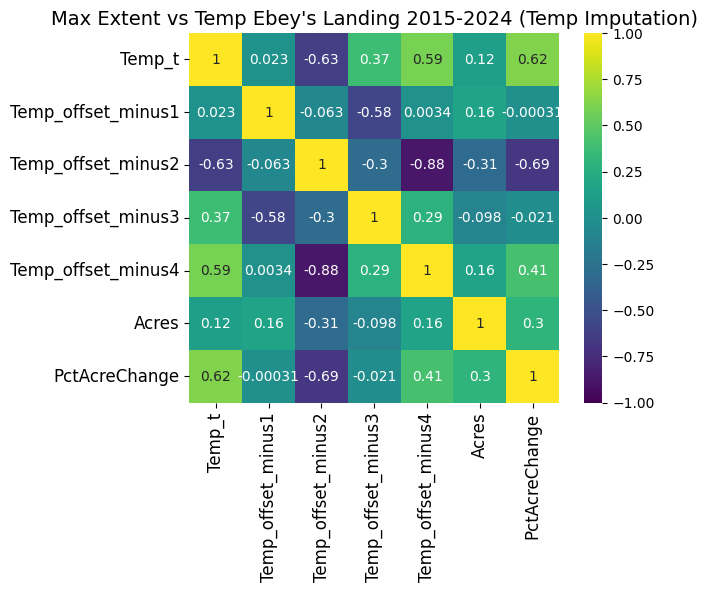

,Site Code,Survey Day,Survey Month,Survey Year,Acres,Temp_t,Temp_offset_minus1,Temp_offset_minus2,Temp_offset_minus3,Temp_offset_minus4,PctAcreChange
0,EBL,15.0,8.0,2015.0,18.354044,13.00,12.18125,12.18125,12.18125,12.18125,NaN
1,EBL,22.0,7.0,2016.0,20.396699,12.00,13.00000,12.00000,12.00000,12.00000,11.129181
2,EBL,16.0,9.0,2017.0,21.534815,11.00,12.00000,13.00000,11.00000,11.00000,5.579906
3,EBL,7.0,8.0,2018.0,21.293413,12.00,11.00000,12.00000,13.00000,12.18125,-1.120989
4,EBL,13.0,8.0,2019.0,41.131154,13.00,12.00000,11.00000,12.00000,13.00000,93.163749
5,EBL,30.0,8.0,2020.0,41.614620,11.95,13.00000,12.00000,11.00000,12.00000,1.175426
6,EBL,11.0,8.0,2021.0,37.681341,12.00,11.95000,13.00000,12.00000,11.00000,-9.451676
7,EBL,23.0,8.0,2022.0,38.629817,12.15,12.00000,11.95000,13.00000,12.00000,2.517096
8,EBL,14.0,8.0,2023.0,31.122627,12.00,12.15000,12.00000,11.95000,13.00000,-19.433665
9,EBL,20.0,8.0,2024.0,33.207906,11.35,12.00000,12.15000,12.00000,11.95000,6.700200


In [37]:
max_corr(Ebeys_Landing)

/tmp/ipython-input-650873782.py:108: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_max[col] = df_max[col].fillna(df_max["MonthlyTempMean"])


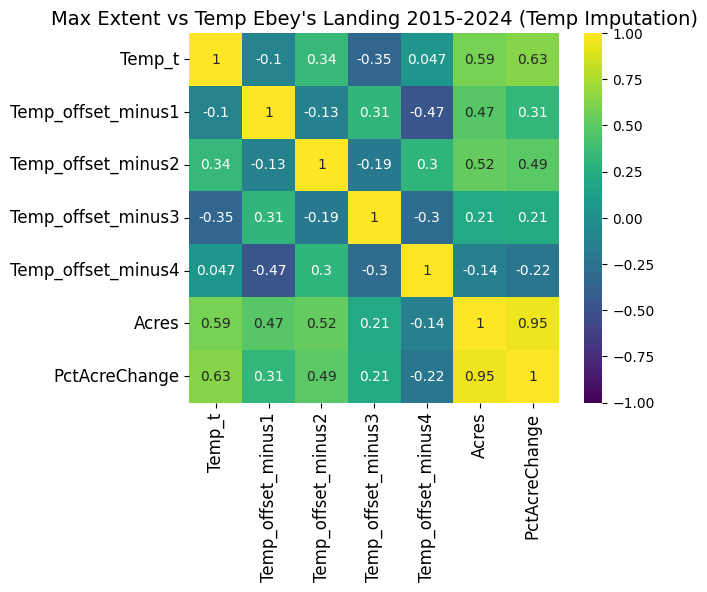

,Site Code,Survey Day,Survey Month,Survey Year,Acres,Temp_t,Temp_offset_minus1,Temp_offset_minus2,Temp_offset_minus3,Temp_offset_minus4,PctAcreChange
0,SHPT-E,15.0,9.0,2017.0,8.398104,14.000,13.116667,13.116667,13.116667,13.116667,NaN
1,SHPT-E,10.0,9.0,2018.0,10.128359,14.000,14.000000,13.116667,13.116667,13.116667,20.602937
2,SHPT-E,18.0,8.0,2019.0,12.096496,17.000,14.000000,14.000000,13.832500,13.832500,19.431941
3,SHPT-E,18.0,9.0,2020.0,8.583313,11.350,17.000000,14.000000,14.000000,13.116667,-29.042983
4,SHPT-E,20.0,8.0,2021.0,8.483059,13.330,11.350000,17.000000,14.000000,14.000000,-1.168013
5,SHPT-E,1.0,7.0,2022.0,5.374904,10.835,13.330000,11.350000,17.000000,14.000000,-36.639547
6,SHPT-E,4.0,8.0,2023.0,1.216887,12.800,10.835000,13.330000,11.350000,17.000000,-77.359844
7,SHPT-E,16.0,8.0,2024.0,0.390402,12.200,12.800000,10.835000,13.330000,11.350000,-67.918008


In [38]:
fill_temperature(Shannon_Point_East)
max_corr(Shannon_Point_East)

/tmp/ipython-input-650873782.py:108: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_max[col] = df_max[col].fillna(df_max["MonthlyTempMean"])


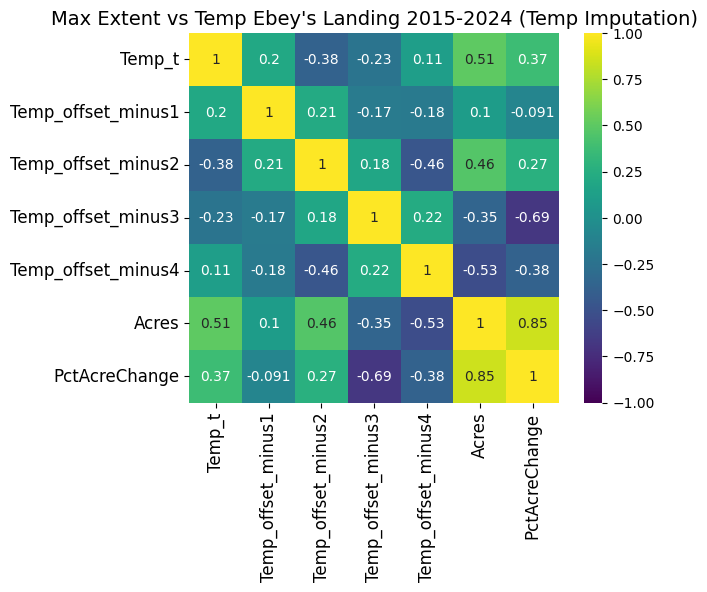

,Site Code,Survey Day,Survey Month,Survey Year,Acres,Temp_t,Temp_offset_minus1,Temp_offset_minus2,Temp_offset_minus3,Temp_offset_minus4,PctAcreChange
0,SHPT-W,15.0,9.0,2017.0,5.081829,12.000,12.649,12.649,12.649,12.649,NaN
1,SHPT-W,10.0,9.0,2018.0,9.818176,16.000,12.000,12.649,12.649,12.649,93.201636
2,SHPT-W,28.0,7.0,2019.0,4.414529,14.000,16.000,12.000,14.000,14.000,-55.037181
3,SHPT-W,18.0,9.0,2020.0,7.790410,11.400,14.000,16.000,12.000,12.649,76.472068
4,SHPT-W,19.0,9.0,2021.0,4.860296,10.695,11.400,14.000,16.000,12.000,-37.611814
5,SHPT-W,12.0,8.0,2022.0,3.267264,11.945,10.695,11.400,14.000,16.000,-32.776441
6,SHPT-W,1.0,9.0,2023.0,4.720687,13.150,11.945,10.695,11.400,14.000,44.484413
7,SHPT-W,16.0,8.0,2024.0,6.095017,12.200,13.150,11.945,10.695,11.400,29.112919


In [39]:
fill_temperature(Shannon_Point_West)
max_corr(Shannon_Point_West)

In [40]:
allbed = pd.read_csv("https://raw.githubusercontent.com/sgolden3/Data-5100-Kelp/refs/heads/main/Data/cleaned_data/AllBeds_Clean.csv")

allbed[["Temp1 Shore Edge","Temp2 Shore Edge","Temp1 Water Edge","Temp2 Water Edge"]] = \
allbed[["Temp1 Shore Edge","Temp2 Shore Edge","Temp1 Water Edge","Temp2 Water Edge"]].apply(pd.to_numeric, errors="coerce")


allbed = allbed.sort_values(["Site Code", "Survey Year"])


allbed["PctAcreChange"] = (
    allbed.groupby("Site Code")["Acres"].pct_change() * 100
)

/tmp/ipython-input-3330280361.py:11: FutureWarning: The default fill_method='ffill' in SeriesGroupBy.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  allbed.groupby("Site Code")["Acres"].pct_change() * 100


In [41]:
allbed.info()

<class 'pandas.core.frame.DataFrame'>
Index: 330 entries, 0 to 329
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Bed Name             330 non-null    object 
 1   Site Code            330 non-null    object 
 2   Survey Date          330 non-null    object 
 3   Survey Day           330 non-null    float64
 4   NWSC Max Ext         329 non-null    float64
 5   Survey Month         330 non-null    float64
 6   Survey Year          330 non-null    float64
 7   Acres                328 non-null    float64
 8   Temp                 126 non-null    float64
 9   Temp1 Shore Edge     157 non-null    float64
 10  Temp1 Water Edge     171 non-null    float64
 11  Temp2 Shore Edge     82 non-null     float64
 12  Temp2 Water Edge     92 non-null     float64
 13  Ave Temp Shore Edge  159 non-null    float64
 14  Ave Temp Water Edge  170 non-null    float64
 15  PctAcreChange        312 non-null    float64


In [ ]:
fill_temperature(allbed)
max_corr(allbed)

In [ ]:
fill_temperature(Possession_Point)
max_corr(Possession_Point)

In [ ]:
fill_temperature(Polnell_Point)
max_corr(Polnell_Point)

In [ ]:
fill_temperature(North_Beach_East)
max_corr(North_Beach_East)

In [ ]:
fill_temperature(allbed)
max_corr(allbed)